## Word Embeddings and T-SNE exercise
We will work with job ads from job.ch. A dataset of English job ads is provided.

The goal of this exercise will be to develop a working understanding of Word2vec and use t-sne as a way to analyze word embeddings

Like any classical NLP task the steps in this analysis will be

- Clean data
- Build a corpus
- Train word2vec
- Visualize using t-sne

In [160]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/job_ads_eng.csv')  # .sample(50000, random_state=23)
data.head()

,Keywords,Job title,Date published,Alive until,Company name,Location,Company type,Contract type,Occupation,Job rank,Content,Industry,Official website,Canton initials,Canton name
0,ICT System Engineer,System Engineer,2019-05-27 00:00:00,2019-06-05 00:00:00,Harvey Nash AG,Zürich,Consultants,Unlimited employment,100,Employee,System EngineerJob Description Overview of b...,"Recruitment agency, Staffing",http://www.harveynash.com/ch,ZH,Zurich
1,Automation Engineer,Automation Engineer with DeltaV,2019-04-23 00:00:00,2019-05-03 00:00:00,Spring Professional Engineering,Sion,Consultants,Unlimited employment,100,Position with responsibilities,Ihre Herausforderung You plan and implement A...,"Recruitment agency, Staffing",https://www.springprofessional.ch/,VS,Valais
2,Development Engineer,Junior Development Engineer 100% (m/f/d),2019-05-08 00:00:00,2019-05-24 00:00:00,Zentra AG Ihr Jobprofi,Canton of Zug,Consultants,Unlimited employment,Temporary,Position with responsibilities,Since 1989 - more than a quarter of a centur...,"Recruitment agency, Staffing",http://www.zentra.ch,ZG,Zug
3,Contract Analyst,Contract & Commercial Manager,2019-06-14 00:00:00,2019-06-24 00:00:00,Huawei Technologies Switzerland AG,Dübendorf ZH,Large-scale entreprises,Unlimited employment,100,Position with responsibilities,Huawei is a leading global provider of informa...,"Information technology, Telecom.",http://www.huawei.com/,ZH,Zurich
4,Executive Assistant,Executive Assistant 100 %,2019-06-19 00:00:00,2019-06-24 00:00:00,Habasit AG,Reinach,Small and medium-sized enterprises,Unlimited employment,100,Employee,Executive Assistant 100 %Habasit is an interna...,Industry various,http://www.habasit.com,BL,Basel


In [163]:
#%debug
STOP_WORDS = nltk.corpus.stopwords.words('english')

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = re.sub("\s\s+", " ", sentence)
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data[data['Content'] == data['Content']]  # removes nan since nan == nan -> False
    
    for col in ['Content']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

,Keywords,Job title,Date published,Alive until,Company name,Location,Company type,Contract type,Occupation,Job rank,Content,Industry,Official website,Canton initials,Canton name
0,ICT System Engineer,System Engineer,2019-05-27 00:00:00,2019-06-05 00:00:00,Harvey Nash AG,Zürich,Consultants,Unlimited employment,100,Employee,system engineerjob description overview busine...,"Recruitment agency, Staffing",http://www.harveynash.com/ch,ZH,Zurich
1,Automation Engineer,Automation Engineer with DeltaV,2019-04-23 00:00:00,2019-05-03 00:00:00,Spring Professional Engineering,Sion,Consultants,Unlimited employment,100,Position with responsibilities,ihre herausforderung plan implement automation...,"Recruitment agency, Staffing",https://www.springprofessional.ch/,VS,Valais
2,Development Engineer,Junior Development Engineer 100% (m/f/d),2019-05-08 00:00:00,2019-05-24 00:00:00,Zentra AG Ihr Jobprofi,Canton of Zug,Consultants,Unlimited employment,Temporary,Position with responsibilities,since 1989 quarter century zentra ag stands r...,"Recruitment agency, Staffing",http://www.zentra.ch,ZG,Zug
3,Contract Analyst,Contract & Commercial Manager,2019-06-14 00:00:00,2019-06-24 00:00:00,Huawei Technologies Switzerland AG,Dübendorf ZH,Large-scale entreprises,Unlimited employment,100,Position with responsibilities,huawei leading global provider information com...,"Information technology, Telecom.",http://www.huawei.com/,ZH,Zurich
4,Executive Assistant,Executive Assistant 100 %,2019-06-19 00:00:00,2019-06-24 00:00:00,Habasit AG,Reinach,Small and medium-sized enterprises,Unlimited employment,100,Employee,executive assistant 100 habasit international ...,Industry various,http://www.habasit.com,BL,Basel


In [164]:
data[data['Job title'].str.contains('Data')]['Content'].values[1]

'data integration data store data analysis data dictionary sql javac pythondata science developer responsibilities setup development large groupwide data store containing wide range different data used hr etc organizational data service management data infrastructure data etc data integration data staging analysis stored data setup data dictionary development itsm suite focussing ucmdb development java python work longterm project different stages taking responsibilities delivery objects parts applications requirements experience data integration etl processes larger environment strong sql skills intermediate knowledge objectoriented programming java c python fluent english language skills nice experience data science statistics r dwh understanding interest service management itil infrastructure processes knowledge angular german language skills personality good communication skills strong customer focused company working mainly top 500 companies pay great attention training developmen

In [108]:
#TO DO: complete the build_corpus function following the description
        #output example: [[''overview', 'business', 'area', 'project', 'resource'], ['work', 'strategic','programs']]

def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
            
    return corpus

corpus = build_corpus(data)              
corpus[:1]

[['system',
  'engineerjob',
  'description',
  '',
  '',
  'overview',
  'business',
  'area',
  'project',
  'resource',
  'work',
  'strategic',
  'programs',
  'enterprise',
  'services',
  'department',
  'entire',
  'chief',
  'technology',
  'office',
  'within',
  'bank',
  'key',
  'deliveries',
  'based',
  'servicenow',
  'platform',
  'midserver',
  'infrastructure',
  'consists',
  'configuration',
  'management',
  'database',
  'cmdb',
  'multiple',
  'automatic',
  'semiautomatic',
  'integrations',
  'various',
  'tools',
  'applications',
  '',
  '',
  'key',
  'responsibilities',
  '',
  'exciting',
  'opportunity',
  'lead',
  'servicenow',
  'data',
  'integration',
  'engineering',
  'stream',
  'including',
  'development',
  'maintenance',
  'servicenow',
  'midserver',
  'infrastructure',
  'executing',
  'changes',
  '',
  'analysis',
  'incidents',
  'problem',
  'tickets',
  'role',
  'includes',
  'deep',
  'troubleshooting',
  'complex',
  'issues',
  'cod

## Word2Vec

In [112]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
model.wv['python']

array([ 0.95350397,  1.9346203 , -4.3259606 ,  2.0228355 ,  0.36369836,
        1.5746585 , -1.7469652 ,  3.7716918 ,  0.01025665,  3.776415  ,
        2.4524674 ,  0.42626885, -1.4374658 , -0.27788392, -0.80419964,
       -0.02684331, -2.637327  ,  2.4713993 , -2.3074234 , -0.23165382,
       -1.6670008 , -0.49146172,  0.09162964,  2.1974468 ,  1.4880315 ,
       -2.2405248 ,  1.6526122 ,  1.1595953 , -1.4155787 , -0.6203672 ,
        2.4980617 , -1.6858674 , -0.12104417, -1.5502923 ,  2.5877624 ,
       -0.4399845 ,  1.7186388 , -0.17817953, -2.2568915 ,  3.0925925 ,
       -1.2318786 , -1.8784378 , -2.86134   , -1.3421667 ,  2.5510914 ,
        1.4402668 , -0.99134827,  0.19967803, -2.4804523 , -0.7259474 ,
       -2.388289  ,  2.7529273 ,  0.25084126,  3.0181653 , -2.5993907 ,
       -1.4040074 , -1.5510477 ,  1.6496574 , -0.40520734,  1.5010197 ,
       -0.5233269 ,  1.8448845 , -1.2298584 ,  3.2982135 , -0.23939669,
       -0.88673604,  1.7958177 , -0.8621716 ,  0.95581895, -1.60

## t-sne plot

In [132]:
#TO DO: Plot the word corpus in a two dimensional plane using dimensionality reduction techniques
def tsne_plot(model, wordlist = []):


/anaconda3/envs/jobcloud/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


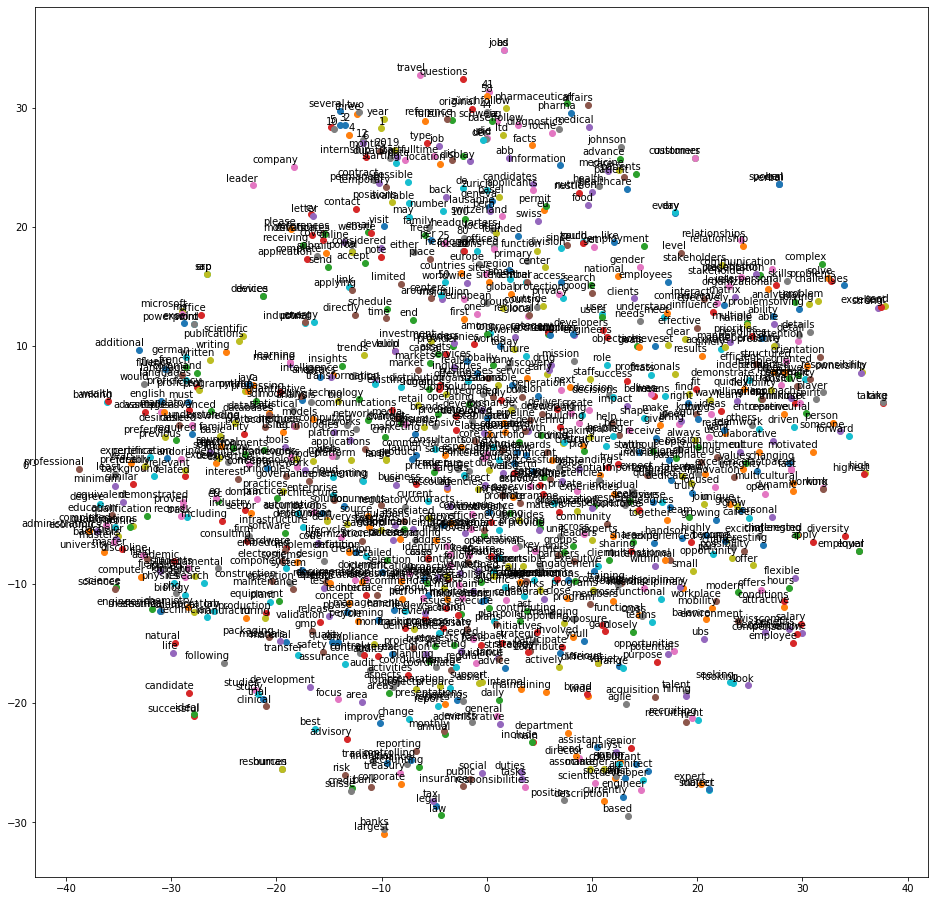

In [114]:
tsne_plot(model)

## More model

/anaconda3/envs/jobcloud/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


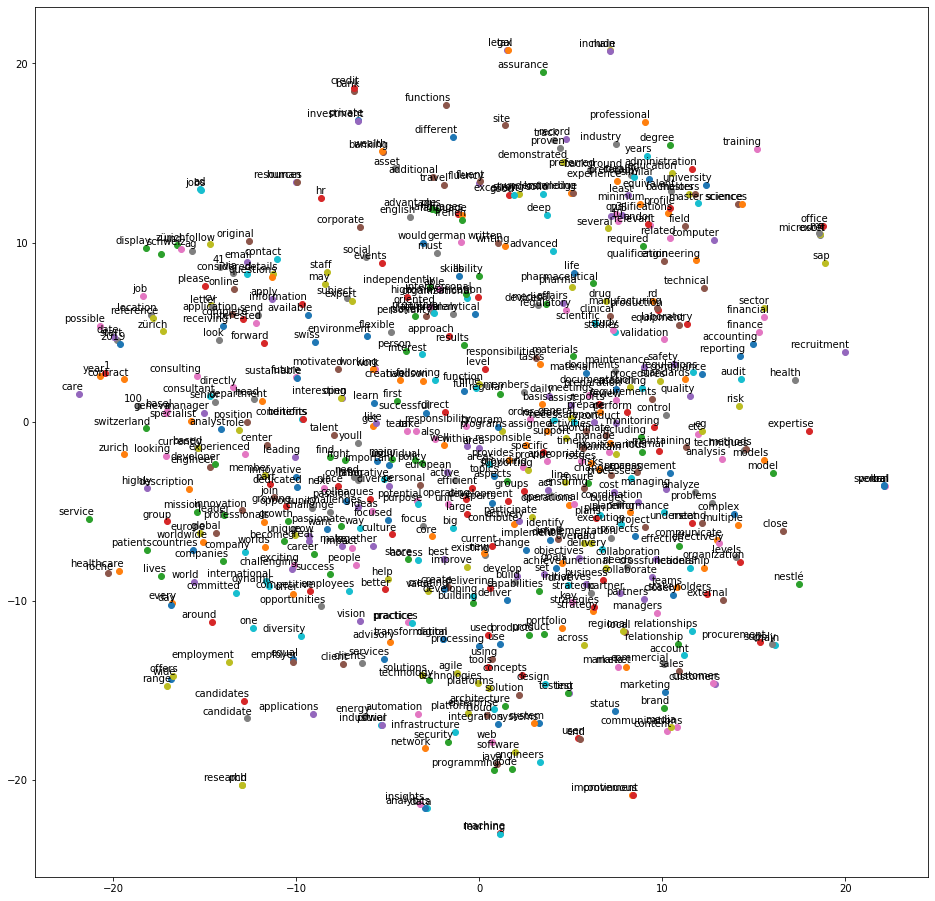

In [115]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=1000, workers=4)
tsne_plot(model)

/anaconda3/envs/jobcloud/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


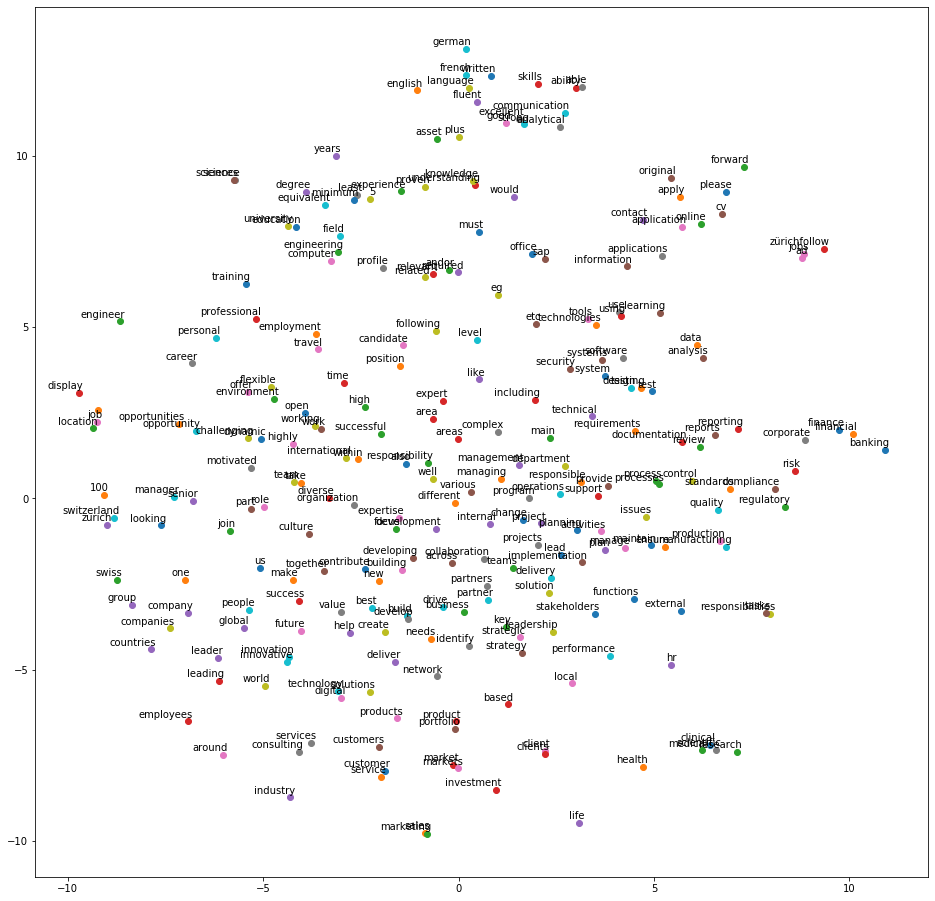

In [117]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=100, workers=4)
tsne_plot(model)

## Let's find some similar words to our query

In [118]:
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=50, workers=4)

/anaconda3/envs/jobcloud/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/envs/jobcloud/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


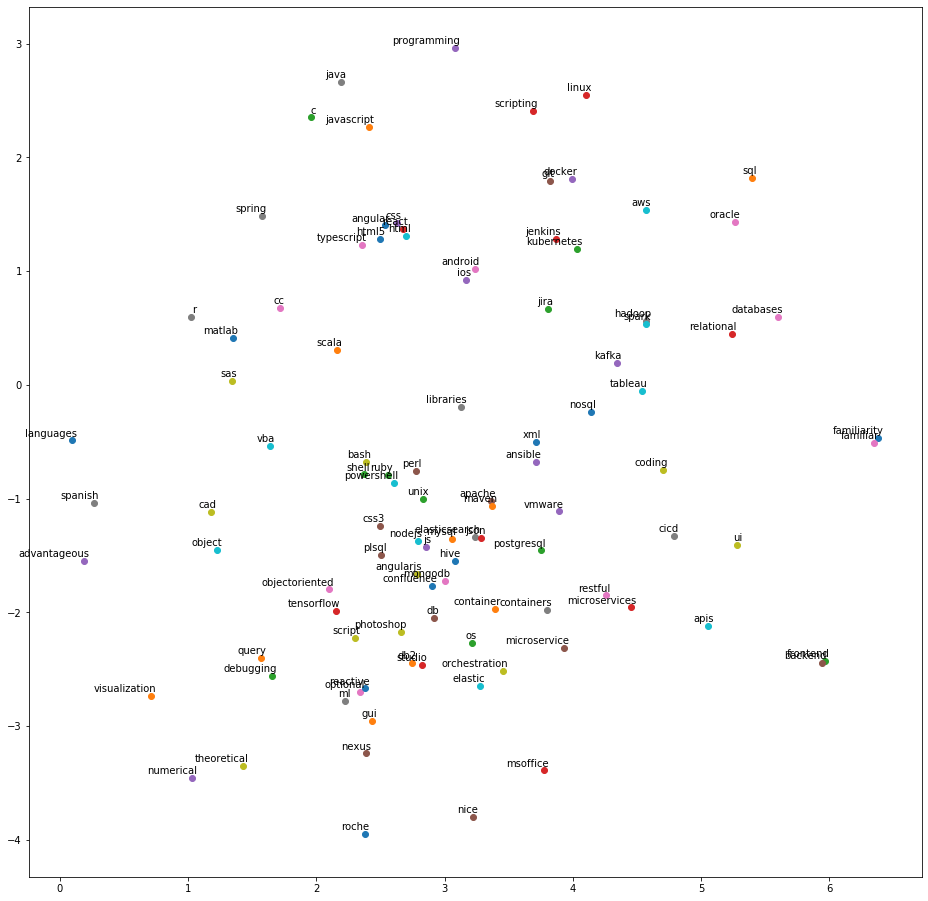

In [157]:
# TODO: Select a word and plot the words most similiar to it

search_word = 'python'
m_similar = model.most_similar('search_word', topn=100)

wordlist = 
# add the word itself
wordlist.append(search_word)

# plot the selected word + the most similiar ones
tsne_plot(model, wordlist)



In [145]:
m_similar

[('aws', 0.7921808958053589),
 ('vmware', 0.7864894866943359),
 ('amazon', 0.775770366191864),
 ('orchestration', 0.7702285051345825),
 ('server', 0.763622522354126),
 ('virtualization', 0.7418113946914673),
 ('container', 0.7383087277412415),
 ('db', 0.7350199222564697),
 ('docker', 0.7268608212471008),
 ('mongodb', 0.718559741973877),
 ('sharepoint', 0.7175288796424866),
 ('microservices', 0.714431643486023),
 ('oracle', 0.7130045890808105),
 ('middleware', 0.7062268257141113),
 ('apis', 0.6975741386413574),
 ('windows', 0.6932154893875122),
 ('containers', 0.6920350193977356),
 ('ansible', 0.6906468868255615),
 ('cloud', 0.6893259286880493),
 ('xml', 0.6884911060333252),
 ('mysql', 0.6826016902923584),
 ('hana', 0.6818815469741821),
 ('android', 0.6793957948684692),
 ('nosql', 0.6791905164718628),
 ('restful', 0.6779782772064209),
 ('bi', 0.6772934198379517),
 ('os', 0.677282989025116),
 ('kafka', 0.6767074465751648),
 ('kubernetes', 0.6756290197372437),
 ('hybrid', 0.67502820491790